In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 100)

In [2]:
train = pd.read_csv('./cs-training.csv', index_col=0)

In [3]:
test = pd.read_csv('./cs-test.csv', index_col=0)

In [4]:
test.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0


In [5]:
train.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [6]:
combine = pd.concat([train, test], axis=0)

In [7]:
combine.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [8]:
combine.columns = ['target', 'unsecured_line_utilization', 'age', 'count_of_30-59_days_past_due_not_worse', 'debt_ratio', 'monthly_income', 'count_open_creditlines_and_loans', 'count_90_days_late',
                'count_real_estate_loans', 'count_of_60-89_days_past_due_not_worse', 'count_dependents']

In [9]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 1 to 101503
Data columns (total 11 columns):
target                                    150000 non-null float64
unsecured_line_utilization                251503 non-null float64
age                                       251503 non-null int64
count_of_30-59_days_past_due_not_worse    251503 non-null int64
debt_ratio                                251503 non-null float64
monthly_income                            201669 non-null float64
count_open_creditlines_and_loans          251503 non-null int64
count_90_days_late                        251503 non-null int64
count_real_estate_loans                   251503 non-null int64
count_of_60-89_days_past_due_not_worse    251503 non-null int64
count_dependents                          244953 non-null float64
dtypes: float64(5), int64(6)
memory usage: 23.0 MB


In [10]:
combine.describe()

,target,unsecured_line_utilization,age,count_of_30-59_days_past_due_not_worse,debt_ratio,monthly_income,count_open_creditlines_and_loans,count_90_days_late,count_real_estate_loans,count_of_60-89_days_past_due_not_worse,count_dependents
count,150000.000000,251503.000000,251503.000000,251503.000000,251503.000000,2.016690e+05,251503.000000,251503.000000,251503.000000,251503.000000,244953.000000
mean,0.066840,5.750415,52.339694,0.434245,349.562468,6.744818e+03,8.453064,0.278370,1.016155,0.252466,0.761995
std,0.249746,229.633980,14.775120,4.335643,1884.792016,2.571761e+04,5.145194,4.312539,1.121935,4.299204,1.123905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029977,41.000000,0.000000,0.174330,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153575,52.000000,0.000000,0.365612,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561293,63.000000,0.000000,0.861754,8.212000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,7.727000e+06,85.000000,98.000000,54.000000,98.000000,43.000000


In [11]:
combine.unsecured_line_utilization.quantile(q=0.99)

1.0912907162

In [12]:
# highly likely that unsecured_line_utilization to be more than 1.1
# assume that any value above 1.1 is erroneous 
print("count of erroneous unsecured_line_utilization: " + str(len(combine.query("unsecured_line_utilization > 1.1"))))

count of erroneous unsecured_line_utilization: 2406


erroneous unsecuredline_utilization is about 1% of the entire data. I will replace these erroneous values with the median value of unsecured_line_utilization

In [13]:
# replacing errorneous values for unsecured_line_utilization
combine.loc[combine.query("unsecured_line_utilization >= 1.1").index.values, 'unsecured_line_utilization'] = combine.query("unsecured_line_utilization < 1.1").unsecured_line_utilization.median()

In [14]:
# replacing age = 0 with the mean age of data set
combine.loc[combine.query("age == 0").index.values, 'age'] = combine.query("age != 0").age.median()

In [15]:
combine.count_dependents.describe()

count    244953.000000
mean          0.761995
std           1.123905
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          43.000000
Name: count_dependents, dtype: float64

In [16]:
# impute null values in count_dependents column with median value, i.e. 0
combine.count_dependents.fillna(0, inplace=True)

In [26]:
combine['age_group'] = ['21- 40' if (i>=21 and i<41) else '41-60' if (i>=41 and i<61) else '61-80' if (i>=61 and i<81) else '>81' for i in combine.age]

In [ ]:
combine.

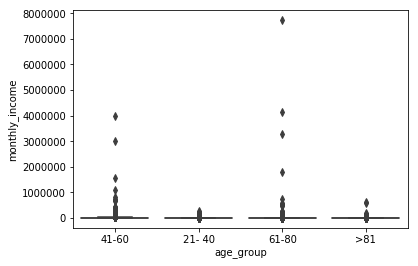

In [38]:
_ = sns.boxplot(x='age_group', y='monthly_income', data=combine)

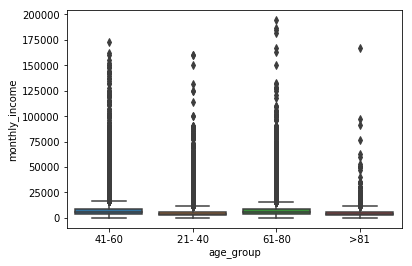

In [42]:
_ = sns.boxplot(x='age_group', y='monthly_income', data=combine.query("monthly_income < 200000"))

In [44]:
combine.query("monthly_income > 0").monthly_income.quantile(q=0.99)

25325.57999999926

In [45]:
combine = (
    combine
    .pipe(lambda x: x.assign(monthly_income=np.where(combine[combine.monthly_income > 25000]

,target,unsecured_line_utilization,age,count_of_30-59_days_past_due_not_worse,debt_ratio,monthly_income,count_open_creditlines_and_loans,count_90_days_late,count_real_estate_loans,count_of_60-89_days_past_due_not_worse,count_dependents,age_group
5,0.0,0.907239,49.0,1,0.024926,63588.0,7,0,1,0,0.0,41-60
267,0.0,0.007983,43.0,1,0.009691,208333.0,11,0,1,0,1.0,41-60
275,0.0,0.292645,57.0,0,0.205928,26484.0,11,0,2,0,3.0,41-60
412,0.0,0.265705,56.0,0,0.259103,31666.0,8,0,3,0,1.0,41-60
562,0.0,0.162077,38.0,0,0.024885,70000.0,6,0,1,0,2.0,21- 40
604,0.0,0.019154,49.0,0,0.201026,33333.0,6,0,3,0,4.0,41-60
1105,0.0,0.369172,82.0,0,0.048229,26000.0,12,0,1,0,0.0,>81
1379,0.0,0.081354,59.0,0,0.028554,60200.0,13,0,1,0,1.0,41-60
1538,0.0,0.510293,59.0,0,0.316978,61000.0,13,0,2,0,1.0,41-60
1762,0.0,0.000172,71.0,0,0.000000,30000.0,8,0,0,0,0.0,61-80


In [40]:
len(combine.query("monthly_income >25000"))

2021

In [41]:
len(combine)

251503

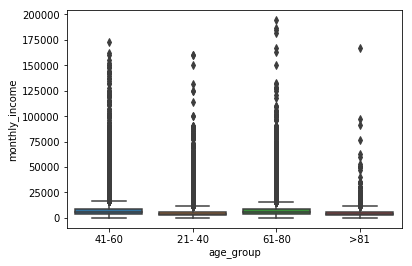

83005.32800001078

In [34]:
combine.query("monthly_income == 83000")

,target,unsecured_line_utilization,age,count_of_30-59_days_past_due_not_worse,debt_ratio,monthly_income,count_open_creditlines_and_loans,count_90_days_late,count_real_estate_loans,count_of_60-89_days_past_due_not_worse,count_dependents,age_group
68281,0.0,1.000000,45.0,0,0.136818,83000.0,6,0,2,0,4.0,41-60
129390,0.0,0.000000,62.0,0,0.064855,83000.0,10,0,4,0,0.0,61-80
48601,NaN,0.157289,54.0,0,0.008217,83000.0,8,0,0,0,3.0,41-60
80397,NaN,0.762257,41.0,0,0.059686,83000.0,5,0,2,0,4.0,41-60


C:\Users\timothy.ong\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


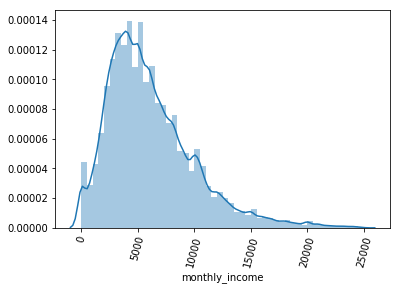

In [31]:
_ = sns.distplot(combine[combine.monthly_income.notnull()].query("monthly_income< 25000").monthly_income)
_ = plt.xticks(rotation=75)

In [27]:
len(combine[combine.monthly_income.notnull()].query("monthly_income< 200000"))/len(combine[combine.monthly_income.notnull()])

0.9997669448452663

In [29]:
combine[combine.monthly_income.notnull()].query("monthly_income > 25000").groupby("target").agg({"age":"count"}).reset_index()

,target,age
0,0.0,1106
1,1.0,62


C:\Users\timothy.ong\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


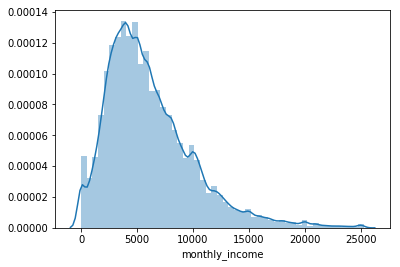

In [133]:
_ = sns.distplot(combine.query("monthly_income >= 0 and monthly_income <={}".format(combine.query("monthly_income != 0").monthly_income.quantile(q=0.99))).monthly_income)

In [19]:
len(combine.query("monthly_income == 0"))

2654

In [113]:
combine.monthly_income.quantile(q=0.99)

25050.360000000335

In [127]:
combine.query("monthly_income == 0").groupby("target").agg({"age": "count"}).reset_index()

,target,age
0,0.0,1568
1,1.0,66


In [130]:
len(combine.query("monthly_income == 0 and debt_ratio <3"))

200

In [71]:
combine.query("monthly_income > 0").debt_ratio.quantile(q=0.99)

2.9688210751599997

In [124]:
len(combine[combine.monthly_income.isnull()].query("debt_ratio>3"))

46215

We can see that at 99 percentile, debt ratio is less than 3 when monthly income is more than 0

In [72]:
# filling null values in monthly_income column with -1
combine.monthly_income.fillna(-1, inplace=True)

In [73]:
# from the above observations, it is very likely that a person's monthly_income would be zero if his/her debt_ratio is above 3
combine.loc[combine.query("monthly_income == -1 and debt_ratio > 3").index.values, 'monthly_income'] = 0

In [74]:
# how many null values of monthly_income left
len(combine.query("monthly_income == -1"))

3080

In [75]:
combine.age.sort_values().unique()

array([  0,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 107, 109], dtype=int64)

In [76]:
combine.query("age == 0")

,target,unsecured_line_utilization,age,count_of_30-59_days_past_due_not_worse,debt_ratio,monthly_income,count_open_creditlines_and_loans,count_90_days_late,count_real_estate_loans,count_of_60-89_days_past_due_not_worse,count_dependents
65696,0.0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [78]:
# creating new column age_group so that we can better ascertain the missing monthly_income based on age
combine['age_group'] = ['21- 30' if (i>=21 and i<31) else '31-40' if (i>=31 and i<41) else '41-50' if (i>=41 and i<50) else '51-60' if (i>=51 and i<60) else '61-70' if (i>=61 and i<70)\
                       else '71-80' if (i>=71 and i<80) else '81-90' if (i>=81 and i<90) else '91-100' if (i>=91 and i<100) else '>101' for i in combine.age]

In [79]:
# filling missing monthly_income values with the median income for that specific age_group
combine.loc[combine.query("monthly_income == -1 and age_group == '31-40'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '31-40'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '41-50'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '41-50'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '51-60'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '51-60'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '61-70'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '61-70'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '71-80'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '71-80'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '81-90'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '81-90'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '91-100'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '91-100'").monthly_income.median()
combine.loc[combine.query("monthly_income == -1 and age_group == '>101'").index.values, 'monthly_income'] = combine.query("monthly_income != -1 and age_group == '>101'").monthly_income.median()

In [80]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 1 to 101503
Data columns (total 12 columns):
target                                    150000 non-null float64
unsecured_line_utilization                251503 non-null float64
age                                       251503 non-null float64
count_of_30-59_days_past_due_not_worse    251503 non-null int64
debt_ratio                                251503 non-null float64
monthly_income                            251503 non-null float64
count_open_creditlines_and_loans          251503 non-null int64
count_90_days_late                        251503 non-null int64
count_real_estate_loans                   251503 non-null int64
count_of_60-89_days_past_due_not_worse    251503 non-null int64
count_dependents                          251503 non-null float64
age_group                                 251503 non-null object
dtypes: float64(6), int64(5), object(1)
memory usage: 29.9+ MB
